In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Replace with the actual path to your CSV file
file_path = '/Users/francoisurbain/Desktop/data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Convert the relevant columns to numeric, removing any potential non-numeric characters (dollar signs, commas, and spaces)
df['Services'] = df['Services'].replace('[\$, ]', '', regex=True).astype(float)
df['ARR'] = df['ARR'].replace('[\$, ]', '', regex=True).astype(float)



In [ ]:
# Define the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with log scales on both axes
sns.scatterplot(x=np.log10(df['ARR']), y=np.log10(df['Services']), hue=df['Geo'], palette="deep")

# Add labels and title
plt.xlabel('Log10 of ARR')
plt.ylabel('Log10 of Services')
plt.title('Scatter Plot of Log10(ARR) vs Log10(Services)')

# Show plot
plt.show()

In [4]:
# Calculate the ratio of Services to ARR
df['Services_to_ARR'] = df['Services'] / df['ARR']

# Group by Geo to see the average ratio per region
geo_analysis = df.groupby('Geo')['Services_to_ARR'].mean().reset_index()

# Display the analysis
print("Average Services to ARR Ratio by Geo:")
print(geo_analysis)

# Calculate potential upside for US based on EMEA's ratio
emea_ratio = geo_analysis[geo_analysis['Geo'] == 'EMEA']['Services_to_ARR'].values[0]
us_ratio = geo_analysis[geo_analysis['Geo'] == 'US']['Services_to_ARR'].values[0]

# Assuming the current US ARR is the sum of all US ARR in the dataset
current_us_arr = df[df['Geo'] == 'US']['ARR'].sum()
potential_us_services = current_us_arr * emea_ratio

print(f"\nPotential US Services Revenue if matching EMEA's ratio: ${potential_us_services - df[df['Geo'] == 'US']['Services'].sum():,.2f}")

Average Services to ARR Ratio by Geo:
    Geo  Services_to_ARR
0  EMEA         0.122857
1    US         0.090330

Potential US Services Revenue if matching EMEA's ratio: $2,418,537.83


In [5]:
# Calculate the ratio of Services to ARR
df['Services_to_ARR'] = df['Services'] / df['ARR']

# Group by Geo to see the average ratio per region
geo_analysis = df.groupby('Geo')['Services_to_ARR'].mean().reset_index()

# Display the analysis
print("Average Services to ARR Ratio by Geo:")
print(geo_analysis)

# Calculate potential upside for US based on EMEA's ratio
emea_ratio = geo_analysis[geo_analysis['Geo'] == 'EMEA']['Services_to_ARR'].values[0]
us_ratio = geo_analysis[geo_analysis['Geo'] == 'US']['Services_to_ARR'].values[0]

# Assuming the current US ARR is the sum of all US ARR in the dataset
current_us_arr = df[df['Geo'] == 'US']['ARR'].sum()
potential_us_services = current_us_arr * emea_ratio

print(f"\nPotential US Services Revenue if matching EMEA's ratio: ${potential_us_services - df[df['Geo'] == 'US']['Services'].sum():,.2f}")

Average Services to ARR Ratio by Geo:
    Geo  Services_to_ARR
0  EMEA         0.122857
1    US         0.090330

Potential US Services Revenue if matching EMEA's ratio: $2,418,537.83


HTML(value='<h2>Analysis of US and EMEA Services Revenue</h2>')

HTML(value='<p>This page presents the scatter plot of Services vs. ARR, the ratio of services areas between US…

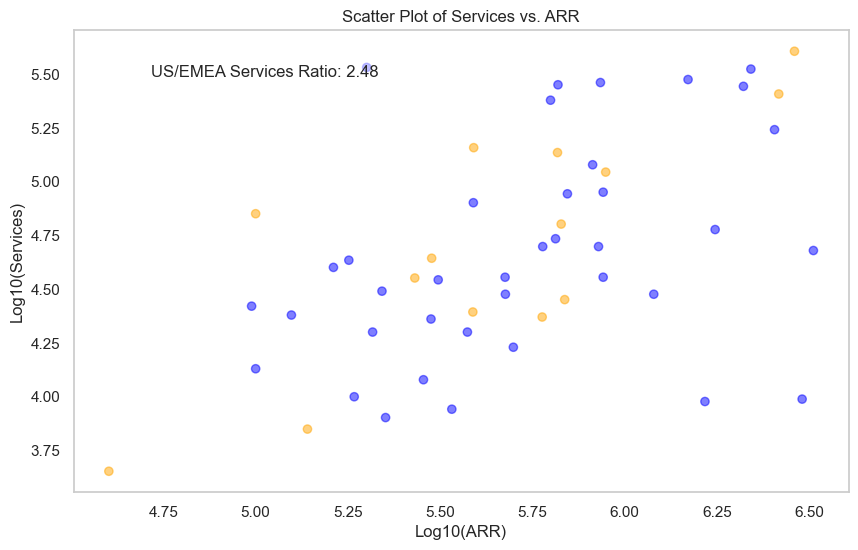

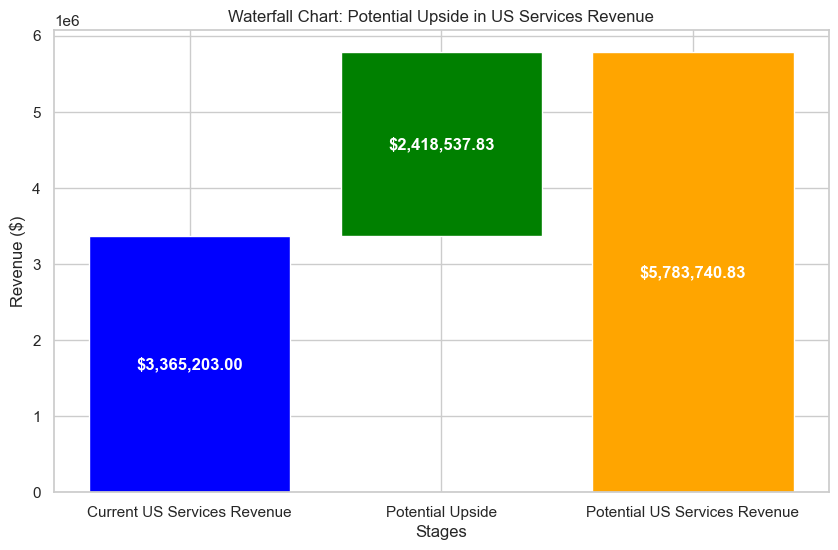

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Load the data into a pandas DataFrame
file_path = '/Users/francoisurbain/Desktop/data.csv'
df = pd.read_csv(file_path)

# Convert the relevant columns to numeric, removing any potential non-numeric characters (dollar signs, commas, and spaces)
df['Services'] = df['Services'].replace('[\$, ]', '', regex=True).astype(float)
df['ARR'] = df['ARR'].replace('[\$, ]', '', regex=True).astype(float)

# Calculate the actual and potential services revenue
current_us_services = df[df['Geo'] == 'US']['Services'].sum()
potential_us_services = current_us_arr * emea_ratio

# Calculate the potential upside
potential_upside = potential_us_services - current_us_services

# Function to create the Waterfall Chart
def plot_waterfall():
    labels = ['Current US Services Revenue', 'Potential Upside', 'Potential US Services Revenue']
    values = [current_us_services, potential_upside, potential_us_services]

    colors = ['blue', 'green', 'orange']

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the first bar (Current US Services Revenue)
    ax.bar(labels[0], values[0], color=colors[0])

    # Plot the second bar (Potential Upside) on top of the first bar
    ax.bar(labels[1], values[1], bottom=values[0], color=colors[1])

    # Plot the third bar (Potential US Services Revenue) starting from the X-axis
    ax.bar(labels[2], values[2], color=colors[2])

    plt.title("Waterfall Chart: Potential Upside in US Services Revenue")
    plt.ylabel("Revenue ($)")
    plt.xlabel("Stages")

    # Annotate the bars with the values
    ax.text(0, values[0] / 2, f"${values[0]:,.2f}", ha='center', va='center', color='white', fontweight='bold')
    ax.text(1, values[0] + values[1] / 2, f"${values[1]:,.2f}", ha='center', va='center', color='white', fontweight='bold')
    ax.text(2, values[2] / 2, f"${values[2]:,.2f}", ha='center', va='center', color='white', fontweight='bold')

    plt.show()

# Function to create the Scatter Plot
def plot_scatter():
    plt.figure(figsize=(10, 6))
    plt.scatter(np.log10(df['ARR']), np.log10(df['Services']), c=df['Geo'].apply(lambda x: 'blue' if x == 'US' else 'orange'), alpha=0.5)
    
    plt.title("Scatter Plot of Services vs. ARR")
    plt.xlabel("Log10(ARR)")
    plt.ylabel("Log10(Services)")
    plt.grid()
    
    # Show the ratio of areas
    us_area = df[df['Geo'] == 'US']['Services'].sum()
    emea_area = df[df['Geo'] == 'EMEA']['Services'].sum()
    ratio = us_area / emea_area if emea_area != 0 else float('inf')
    
    plt.annotate(f"US/EMEA Services Ratio: {ratio:.2f}", xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12,
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.show()

# Create a title and description using Markdown
title = widgets.HTML(value="<h2>Analysis of US and EMEA Services Revenue</h2>")
description = widgets.HTML(value="<p>This page presents the scatter plot of Services vs. ARR, the ratio of services areas between US and EMEA, and a waterfall chart showing the potential upside in US services revenue.</p>")

# Display the title and description
display(title, description)

# Call the functions to plot
plot_scatter()
plot_waterfall()


## Average Services to ARR Ratio by Geo:

| Geo  | Services_to_ARR |
|------|------------------|
| EMEA | 0.122857         |
| US   | 0.090330         |

### Potential US Services Revenue if matching EMEA's ratio: 
**$2,418,537.83**

In [7]:
display(df)

,Geo,Services,ARR,Account Name
0,EMEA,405518.0,2887814.0,BNP Paribas Consolidated
1,EMEA,256510.0,2618100.0,UBS HQ
2,EMEA,144300.0,390000.0,Baloise Holding Ltd
3,EMEA,136920.0,658005.0,HUK-Coburg
4,EMEA,111060.0,888941.0,Novo Nordisk
...,...,...,...,...
83,US,0.0,100000.0,Raymond Corporation
84,US,0.0,484000.0,S&P Global
85,US,0.0,30930.0,Tata Consultancy Services Limited
86,US,0.0,446250.0,Teachers Insurance and Annuity Association of ...


In [8]:
# Calculate the ratio of Services to ARR
df['Services_to_ARR'] = df['Services'] / df['ARR']

# Display the updated DataFrame
print(df[['Geo', 'Services', 'ARR', 'Services_to_ARR']])


     Geo  Services        ARR  Services_to_ARR
0   EMEA  405518.0  2887814.0         0.140424
1   EMEA  256510.0  2618100.0         0.097976
2   EMEA  144300.0   390000.0         0.370000
3   EMEA  136920.0   658005.0         0.208084
4   EMEA  111060.0   888941.0         0.124935
..   ...       ...        ...              ...
83    US       0.0   100000.0         0.000000
84    US       0.0   484000.0         0.000000
85    US       0.0    30930.0         0.000000
86    US       0.0   446250.0         0.000000
87    US       0.0  2245000.0         0.000000

[88 rows x 4 columns]


In [9]:
# Filter for EMEA and US regions
df_em = df[df['Geo'] == 'EMEA']
df_us = df[df['Geo'] == 'US']

# Sort the DataFrames by the Services_to_ARR ratio in descending order and get the top 15
top_15_em = df_em.sort_values(by='Services_to_ARR', ascending=False).head(15)
top_15_us = df_us.sort_values(by='Services_to_ARR', ascending=False).head(15)

# Display the results
print("Top 15 EMEA by Services to ARR Ratio:")
print(top_15_em[['Geo', 'Services', 'ARR', 'Services_to_ARR']])

print("\nTop 15 US by Services to ARR Ratio:")
print(top_15_us[['Geo', 'Services', 'ARR', 'Services_to_ARR']])


Top 15 EMEA by Services to ARR Ratio:
     Geo  Services        ARR  Services_to_ARR
5   EMEA   71100.0   100000.0         0.711000
2   EMEA  144300.0   390000.0         0.370000
3   EMEA  136920.0   658005.0         0.208084
7   EMEA   44126.0   300000.0         0.147087
0   EMEA  405518.0  2887814.0         0.140424
8   EMEA   35700.0   270000.0         0.132222
4   EMEA  111060.0   888941.0         0.124935
13  EMEA    4500.0    40000.0         0.112500
1   EMEA  256510.0  2618100.0         0.097976
6   EMEA   63630.0   673249.0         0.094512
10  EMEA   24800.0   387928.0         0.063929
12  EMEA    7070.0   138168.0         0.051170
9   EMEA   28320.0   688187.0         0.041152
11  EMEA   23500.0   598000.0         0.039298
14  EMEA       0.0   138000.0         0.000000

Top 15 US by Services to ARR Ratio:
   Geo  Services        ARR  Services_to_ARR
19  US  341040.0   200000.0         1.705200
23  US  283148.0   660000.0         0.429012
25  US  240000.0   630000.0         0.

In [10]:
import pandas as pd

# Load the DataFrame from a CSV file
file_path = '/Users/francoisurbain/Desktop/data.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Clean and convert the relevant columns to numeric
df['Services'] = df['Services'].replace('[\$, ]', '', regex=True).astype(float)
df['ARR'] = df['ARR'].replace('[\$, ]', '', regex=True).astype(float)

# Calculate the ratio of Services to ARR
df['Services_to_ARR'] = df['Services'] / df['ARR']

# Filter for EMEA and US regions
df_em = df[df['Geo'] == 'EMEA']
df_us = df[df['Geo'] == 'US']

# Sort the DataFrames by the Services_to_ARR ratio in descending order and get the top 15
top_15_em = df_em.sort_values(by='Services_to_ARR', ascending=False).head(15)
top_15_us = df_us.sort_values(by='Services_to_ARR', ascending=False).head(15)

# Display the results including the customer names
print("Top 15 EMEA by Services to ARR Ratio:")
print(top_15_em[['Geo', 'Account Name', 'Services', 'ARR', 'Services_to_ARR']])

print("\nTop 15 US by Services to ARR Ratio:")
print(top_15_us[['Geo', 'Account Name', 'Services', 'ARR', 'Services_to_ARR']])


Top 15 EMEA by Services to ARR Ratio:
     Geo                                Account Name  Services        ARR  \
5   EMEA  Nordea Pension, Livsforsikringsselskab A/S   71100.0   100000.0   
2   EMEA                         Baloise Holding Ltd  144300.0   390000.0   
3   EMEA                                  HUK-Coburg  136920.0   658005.0   
7   EMEA                                Galapagos NV   44126.0   300000.0   
0   EMEA                    BNP Paribas Consolidated  405518.0  2887814.0   
8   EMEA                                  Topdanmark   35700.0   270000.0   
4   EMEA                                Novo Nordisk  111060.0   888941.0   
13  EMEA                                    Carnival    4500.0    40000.0   
1   EMEA                                      UBS HQ  256510.0  2618100.0   
6   EMEA                        Zurcher Kantonalbank   63630.0   673249.0   
10  EMEA                                     Essence   24800.0   387928.0   
12  EMEA               Admiral Interme